# Audio classification using convolutional neural networks


Audio classification can be performed by converting audio streams into [spectrograms](https://en.wikipedia.org/wiki/Spectrogram), which provide visual representations of spectrums of frequencies as they vary over time, and classifying the spectrograms using [convolutional neural networks](https://en.wikipedia.org/wiki/Convolutional_neural_network) (CNNs). The spectrograms below were generated from WAV files with chainsaw sounds in the foreground and rainforest sounds in the background. Let's use Keras to build a CNN that can identify the tell-tale sounds of logging operations and distinguish them from ambient sounds such as wildlife and thunderstorms.

![](Images/spectrograms.png)

This notebook was inspired by the [Rainforest Connection](https://rfcx.org/), which uses recycled Android phones and a TensorFlow model to monitor rain forests for sounds indicative of illegal activity. For more information, see [The fight against illegal deforestation with TensorFlow](https://blog.google/technology/ai/fight-against-illegal-deforestation-tensorflow/) in the Google AI blog. It is just one example of how AI is making the world a better place.

## Generate spectrograms

The "Sounds" directory contains subdirectories named "background," "chainsaw," "engine," and "storm." Each subdirectory contains 100 WAV files. The WAV files in the "background" directory contain rainforest background noises only, while the files in the other subdirectories include the sounds of chainsaws, engines, and thunderstorms overlaid on the background noises. These WAV files were generated by using a soundscape-synthesis package named [Scaper](https://pypi.org/project/scaper/) to combine sounds in the public [UrbanSound8K](https://urbansounddataset.weebly.com/urbansound8k.html) dataset with rainforest sounds obtained from YouTube.

The first step is to load the WAV files, use a Python package named [Librosa](https://librosa.org/) to generate spectrogram images from them, load the spectrograms into memory, and prepare them for use in training a CNN. To aid in this process, we'll define a pair of helper functions for creating spectrograms from WAV files and converting all the WAV files in a specified directory into spectrograms.

In [1]:
import numpy as np
import librosa.display, os
import matplotlib.pyplot as plt
%matplotlib inline

def create_spectrogram(audio_file, image_file):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)

    y, sr = librosa.load(audio_file)
    ms = librosa.feature.melspectrogram(y, sr=sr)
    log_ms = librosa.power_to_db(ms, ref=np.max)
    librosa.display.specshow(log_ms, sr=sr)

    fig.savefig(image_file)
    plt.close(fig)
    
def create_pngs_from_wavs(input_path, output_path):
    if not os.path.exists(output_path):
        os.makedirs(output_path)

    dir = os.listdir(input_path)

    for i, file in enumerate(dir):
        input_file = os.path.join(input_path, file)
        output_file = os.path.join(output_path, file.replace('.wav', '.png'))
        create_spectrogram(input_file, output_file)

Create PNG files containing spectrograms from all the WAV files in the "Sounds/background" directory.

In [2]:
create_pngs_from_wavs('Sounds/background', 'Spectrograms/background')

C:\Users\AyushSengar\AppData\Local\Temp\ipykernel_11436\1857641683.py:12: FutureWarning: Pass y=[0.02962593 0.04305524 0.00909939 ... 0.01810473 0.04117562 0.02565941] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ms = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\AyushSengar\AppData\Local\Temp\ipykernel_11436\1857641683.py:12: FutureWarning: Pass y=[-0.08858684 -0.12682761 -0.00964435 ...  0.15990162  0.07101583
 -0.0621061 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ms = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\AyushSengar\AppData\Local\Temp\ipykernel_11436\1857641683.py:12: FutureWarning: Pass y=[-0.03262121 -0.247241    0.13185133 ...  0.02584003 -0.00644144
 -0.00838903] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ms = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\AyushSengar\AppData\Local\Temp\ipykern

Create PNG files containing spectrograms from all the WAV files in the "Sounds/chainsaw" directory.

In [3]:
create_pngs_from_wavs('Sounds/chainsaw', 'Spectrograms/chainsaw')

C:\Users\AyushSengar\AppData\Local\Temp\ipykernel_11436\1857641683.py:12: FutureWarning: Pass y=[-0.09551422  0.11302161  0.26683655 ... -0.06191067 -0.06324404
 -0.02823795] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ms = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\AyushSengar\AppData\Local\Temp\ipykernel_11436\1857641683.py:12: FutureWarning: Pass y=[-0.00475912 -0.00385687  0.0385216  ... -0.02407535  0.1755252
  0.14941841] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ms = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\AyushSengar\AppData\Local\Temp\ipykernel_11436\1857641683.py:12: FutureWarning: Pass y=[-0.28253415 -0.01913651  0.4228256  ... -0.2559629  -0.316815
 -0.30615762] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ms = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\AyushSengar\AppData\Local\Temp\ipy

Create PNG files containing spectrograms from all the WAV files in the "Sounds/engine" directory.

In [4]:
create_pngs_from_wavs('Sounds/engine', 'Spectrograms/engine')

C:\Users\AyushSengar\AppData\Local\Temp\ipykernel_11436\1857641683.py:12: FutureWarning: Pass y=[0.02962593 0.04305524 0.00909939 ... 0.01810473 0.04117562 0.02565941] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ms = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\AyushSengar\AppData\Local\Temp\ipykernel_11436\1857641683.py:12: FutureWarning: Pass y=[ 0.00884412  0.01221992  0.00527113 ... -0.01964373 -0.04741571
 -0.05587541] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ms = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\AyushSengar\AppData\Local\Temp\ipykernel_11436\1857641683.py:12: FutureWarning: Pass y=[ 0.00360909 -0.01535599 -0.03415161 ...  0.00592008 -0.00633677
 -0.02815617] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ms = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\AyushSengar\AppData\Local\Temp\ipykern

Create PNG files containing spectrograms from all the WAV files in the "Sounds/storm" directory.

In [5]:
create_pngs_from_wavs('Sounds/storm', 'Spectrograms/storm')

C:\Users\AyushSengar\AppData\Local\Temp\ipykernel_11436\1857641683.py:12: FutureWarning: Pass y=[0.02960776 0.04310114 0.00898376 ... 0.01810473 0.04117562 0.02565941] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ms = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\AyushSengar\AppData\Local\Temp\ipykernel_11436\1857641683.py:12: FutureWarning: Pass y=[ 0.00247686  0.05177783  0.07849635 ... -0.01424231 -0.03227956
 -0.07097486] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ms = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\AyushSengar\AppData\Local\Temp\ipykernel_11436\1857641683.py:12: FutureWarning: Pass y=[ 0.02950356  0.02816983 -0.03247916 ...  0.01012709  0.02738096
  0.04152814] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ms = librosa.feature.melspectrogram(y, sr=sr)
C:\Users\AyushSengar\AppData\Local\Temp\ipykern

Define two new helper functions for loading and displaying spectrograms and declare two Python lists — one to store spectrogram images, and another to store class labels.

In [6]:
from keras.preprocessing import image

def load_images_from_path(path, label):
    images = []
    labels = []

    for file in os.listdir(path):
        images.append(image.img_to_array(image.load_img(os.path.join(path, file), target_size=(224, 224, 3))))
        labels.append((label))
        
    return images, labels

def show_images(images):
    fig, axes = plt.subplots(1, 8, figsize=(20, 20), subplot_kw={'xticks': [], 'yticks': []})

    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i] / 255)
        
x = []
y = []

Load the background spectrogram images, add them to the list named `x`, and label them with 0s.

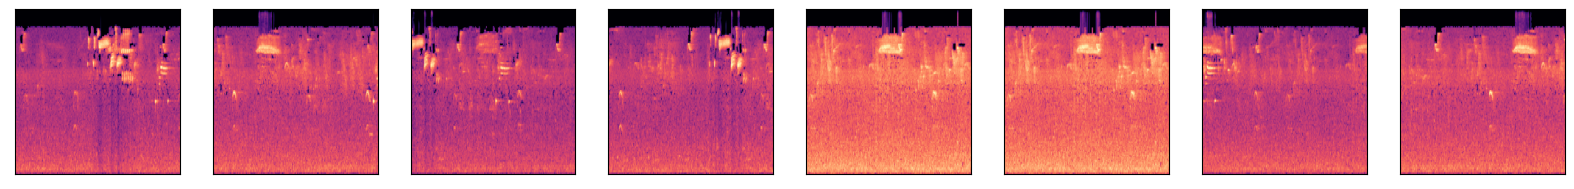

In [7]:
images, labels = load_images_from_path('Spectrograms/background', 0)
show_images(images)
    
x += images
y += labels

Load the chainsaw spectrogram images, add them to the list named `x`, and label them with 1s.

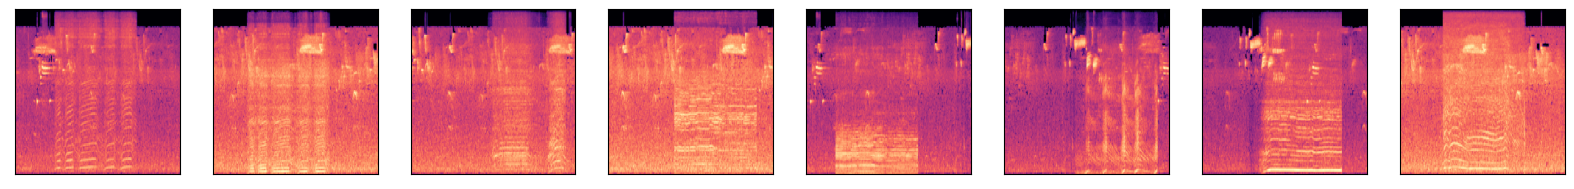

In [8]:
images, labels = load_images_from_path('Spectrograms/chainsaw', 1)
show_images(images)
    
x += images
y += labels

Load the engine spectrogram images, add them to the list named `x`, and label them with 2s.

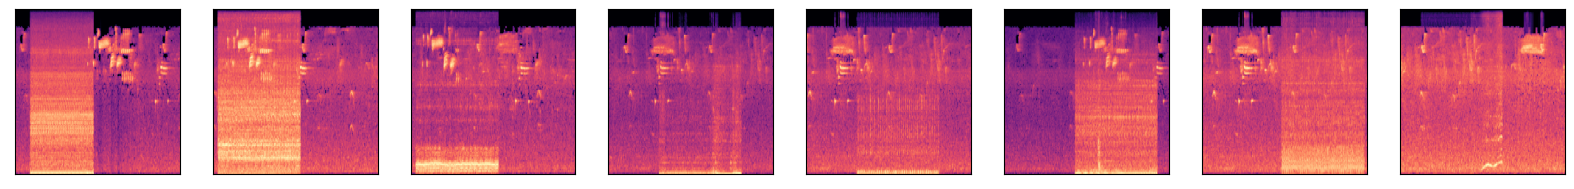

In [9]:
images, labels = load_images_from_path('Spectrograms/engine', 2)
show_images(images)
    
x += images
y += labels

Load the storm spectrogram images, add them to the list named `x`, and label them with 3s.

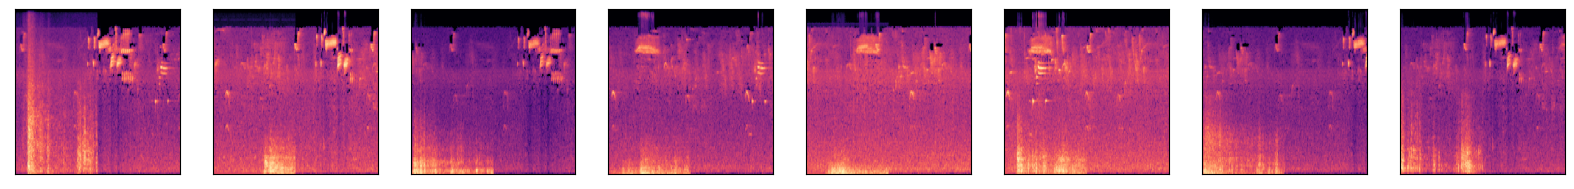

In [10]:
images, labels = load_images_from_path('Spectrograms/storm', 3)
show_images(images)
    
x += images
y += labels

Split the images and labels into two datasets — one for training, and one for testing. Then divide the pixel values by 255 and one-hot-encode the labels using Keras's [to_categorical](https://keras.io/api/utils/python_utils/#to_categorical-function) function.

In [11]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.3, random_state=0)

x_train_norm = np.array(x_train) / 255
x_test_norm = np.array(x_test) / 255

y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

In [12]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class MyModel(nn.Module):
    def __init__(self, num_classes=4):
        super(MyModel, self).__init__()
        
        # Input shape: (B, 3, 224, 224) analogous to (224, 224, 3) in Keras, but channels-first
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=128, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1)
        
        # After four rounds of pooling with kernel_size=2, 
        # input of 224x224 will be reduced to 224/(2^4)=224/16=14 in each spatial dimension.
        # So final feature map size after the last conv/pool block: (128, 14, 14).
        
        # Flattening 128 * 14 * 14 = 128 * 196 = 25088
        self.fc1 = nn.Linear(128 * 14 * 14, 1024)
        self.fc2 = nn.Linear(1024, num_classes)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        
        x = F.relu(self.conv3(x))
        x = self.pool(x)
        
        x = F.relu(self.conv4(x))
        x = self.pool(x)
        
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)  # For training with cross-entropy, no softmax is needed here.
        return x

model = MyModel(num_classes=4)
print(model)



MyModel(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=25088, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=4, bias=True)
)


In [13]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming x_train_norm, y_train_encoded, x_test_norm, and y_test_encoded are numpy arrays
# Convert one-hot encoded labels to class indices
y_train_indices = np.argmax(y_train_encoded, axis=1)
y_test_indices = np.argmax(y_test_encoded, axis=1)

# Convert the data to PyTorch tensors
x_train_tensor = torch.tensor(x_train_norm, dtype=torch.float32).permute(0, 3, 1, 2)  # (N, C, H, W)
y_train_tensor = torch.tensor(y_train_indices, dtype=torch.long)
x_test_tensor = torch.tensor(x_test_norm, dtype=torch.float32).permute(0, 3, 1, 2)
y_test_tensor = torch.tensor(y_test_indices, dtype=torch.long)

# Create DataLoaders for training and validation
train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
test_dataset = TensorDataset(x_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=10, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=10, shuffle=False)

# Define the model, criterion, and optimizer
model = MyModel()  # Ensure MyModel is defined as before
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

epochs = 10
for epoch in range(epochs):
    model.train()
    train_loss = 0.0
    correct_train = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * inputs.size(0)
        correct_train += (outputs.argmax(1) == labels).sum().item()

    train_loss /= len(train_loader.dataset)
    train_accuracy = correct_train / len(train_loader.dataset)

    # Validation loop
    model.eval()
    val_loss = 0.0
    correct_val = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)

            val_loss += loss.item() * inputs.size(0)
            correct_val += (outputs.argmax(1) == labels).sum().item()

    val_loss /= len(test_loader.dataset)
    val_accuracy = correct_val / len(test_loader.dataset)

    print(f"Epoch {epoch+1}/{epochs}: "
          f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, "
          f"Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}")


Epoch 1/10: Train Loss: 1.3957, Train Accuracy: 0.2643, Val Loss: 1.3702, Val Accuracy: 0.4250
Epoch 2/10: Train Loss: 1.1827, Train Accuracy: 0.4179, Val Loss: 0.7541, Val Accuracy: 0.6917
Epoch 3/10: Train Loss: 0.6579, Train Accuracy: 0.6893, Val Loss: 0.5728, Val Accuracy: 0.8250
Epoch 4/10: Train Loss: 0.4755, Train Accuracy: 0.7643, Val Loss: 0.4124, Val Accuracy: 0.8083
Epoch 5/10: Train Loss: 0.3694, Train Accuracy: 0.8286, Val Loss: 0.3405, Val Accuracy: 0.8917
Epoch 6/10: Train Loss: 0.3502, Train Accuracy: 0.8321, Val Loss: 0.4081, Val Accuracy: 0.8333
Epoch 7/10: Train Loss: 0.3437, Train Accuracy: 0.8500, Val Loss: 0.3043, Val Accuracy: 0.9000
Epoch 8/10: Train Loss: 0.2420, Train Accuracy: 0.8679, Val Loss: 0.3008, Val Accuracy: 0.8750
Epoch 9/10: Train Loss: 0.1927, Train Accuracy: 0.9214, Val Loss: 0.3834, Val Accuracy: 0.8417
Epoch 10/10: Train Loss: 0.1713, Train Accuracy: 0.9179, Val Loss: 0.3890, Val Accuracy: 0.8583


In [ ]:
#!pip install fft_conv_pytorch

In [14]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from fft_conv_pytorch import FFTConv2d  # Importing the FFT-based convolution class

In [15]:
class MyModelFFT(nn.Module):
    def __init__(self, num_classes=4):
        super(MyModelFFT, self).__init__()  # Correct: use MyModelFFT here
        
        # Using FFTConv2d instead of nn.Conv2d
        self.conv1 = FFTConv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv2 = FFTConv2d(in_channels=32, out_channels=128, kernel_size=3, padding=1)
        self.conv3 = FFTConv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1)
        self.conv4 = FFTConv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1)
        
        # After four rounds of 2x2 pooling:
        # Input: (B, 3, 224, 224)
        # After 4x pooling (2^4 = 16): feature map size = 14x14 if input is 224x224.
        # Channels after last conv block = 128
        # Flatten size = 128 * 14 * 14 = 25088
        self.fc1 = nn.Linear(128 * 14 * 14, 1024)
        self.fc2 = nn.Linear(1024, num_classes)

    def forward(self, x):
        # Forward pass using fft-based convolutions
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        
        x = F.relu(self.conv3(x))
        x = self.pool(x)
        
        x = F.relu(self.conv4(x))
        x = self.pool(x)
        
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)  # logits are returned
        return x

# Instantiate the model
model = MyModelFFT(num_classes=4)
print(model)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


MyModelFFT(
  (conv1): _FFTConv()
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): _FFTConv()
  (conv3): _FFTConv()
  (conv4): _FFTConv()
  (fc1): Linear(in_features=25088, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=4, bias=True)
)


In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming x_train_norm, y_train_encoded, x_test_norm, and y_test_encoded are numpy arrays
# Convert one-hot encoded labels to class indices
y_train_indices = np.argmax(y_train_encoded, axis=1)
y_test_indices = np.argmax(y_test_encoded, axis=1)

# Convert the data to PyTorch tensors
x_train_tensor = torch.tensor(x_train_norm, dtype=torch.float32).permute(0, 3, 1, 2)  # (N, C, H, W)
y_train_tensor = torch.tensor(y_train_indices, dtype=torch.long)
x_test_tensor = torch.tensor(x_test_norm, dtype=torch.float32).permute(0, 3, 1, 2)
y_test_tensor = torch.tensor(y_test_indices, dtype=torch.long)

# Create DataLoaders for training and validation
train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
test_dataset = TensorDataset(x_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=10, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=10, shuffle=False)

# Define the model, criterion, and optimizer
model = MyModelFFT(num_classes=4)  # Ensure MyModel is defined as before
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

epochs = 10
for epoch in range(epochs):
    model.train()
    train_loss = 0.0
    correct_train = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * inputs.size(0)
        correct_train += (outputs.argmax(1) == labels).sum().item()

    train_loss /= len(train_loader.dataset)
    train_accuracy = correct_train / len(train_loader.dataset)

    # Validation loop
    model.eval()
    val_loss = 0.0
    correct_val = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)

            val_loss += loss.item() * inputs.size(0)
            correct_val += (outputs.argmax(1) == labels).sum().item()

    val_loss /= len(test_loader.dataset)
    val_accuracy = correct_val / len(test_loader.dataset)

    print(f"Epoch {epoch+1}/{epochs}: "
          f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, "
          f"Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}")
